In [6]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from datetime import date
import glob

In [11]:
def process_krige_csv(fname):
    nightstr = fname.split("_")[0].split("/")[1]
    night = date(*[int(x) for x in nightstr.split("-")])
    df = pd.read_csv(fname)
    df["timestamp"] = pd.to_datetime(df["timestamp"])
    df["night"] = night
    df["ts0"] = (df.timestamp - df.timestamp.min()).dt.total_seconds()
    return df

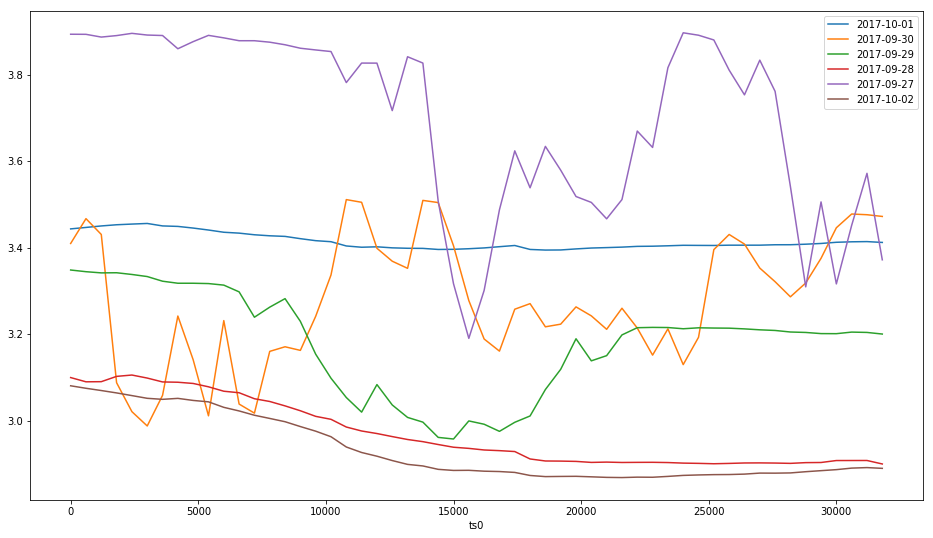

In [15]:
nights = [process_krige_csv(n) for n in glob.glob("kriged/*.csv")]
fig, ax = plt.subplots(1, 1, figsize=(16, 9))
for night in nights:
    night.groupby("ts0").z.mean().plot(ax=ax, label=night["night"].iloc[0])
ax.legend()